# Principal Component Analysis of the Iris Dataset using Databricks

This notebook focuses on implementing Principal Component Analysis (PCA) on the Iris dataset using a Databricks notebook. PCA is a statistical technique used for dimensionality reduction, simplifying the complexity of high-dimensional data while retaining significant patterns and relationships. The Iris dataset, a well-known dataset in data science, comprises 150 observations of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The objective is to reduce these four dimensions into a lower-dimensional space to facilitate easier visualization and analysis, all while preserving as much of the data's variability as possible.

## Procedure and Analysis:
The process begins with the preparation of the data, including loading the dataset, standardizing the features, and ensuring it is ready for PCA. Standardization is an essential step in PCA to prevent features with larger scales from dominating the principal components. Following this, PCA is applied to the standardized data to reduce its dimensionality, typically to two dimensions for easy visualization. The resulting principal components are then examined to understand how much variance each component captures from the data. The final step involves visualizing the transformed data in the reduced dimensional space, providing insights into the data's underlying structure. The reduced dataset can further be used for advanced analyses, such as clustering or predictive modeling. This assignment not only demonstrates the mechanics of PCA but also highlights its practical significance in simplifying complex datasets for enhanced interpretability and analysis.








##  1: Data Preparation
Loads the Iris dataset and standardizes the features for PCA. Standardization is crucial for PCA to ensure each feature contributes equally to the analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset and standardize it
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2: Applying PCA

Applies PCA to reduce the dataset to two dimensions. The choice of two components is for visualization purposes and can be adjusted based on the datasets.

In [4]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Choosing the number of components to keep based on cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Reapplying PCA with optimal number of components
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

## 3: Examining Results

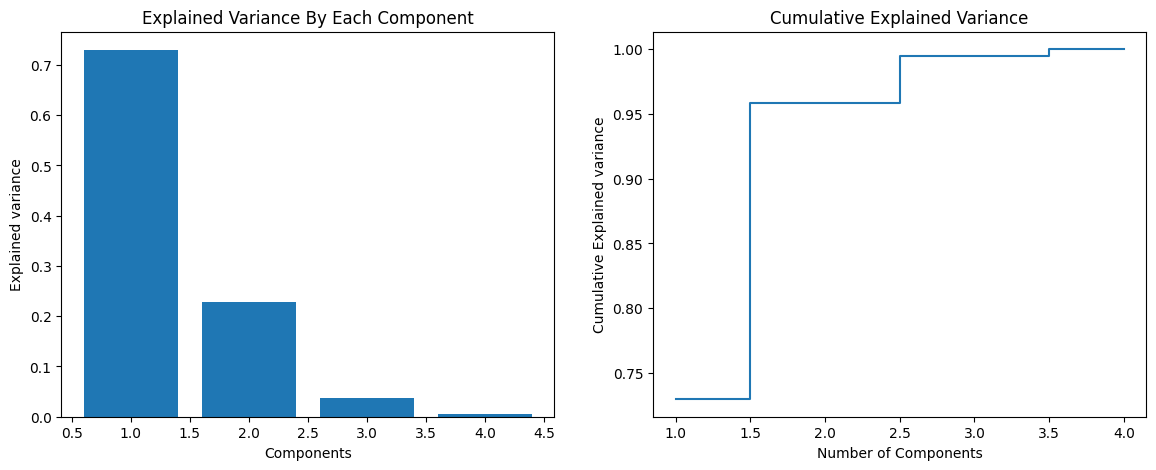

In [6]:
import matplotlib.pyplot as plt

# Plotting the explained variance and cumulative variance
plt.figure(figsize=(14, 5))

# Explained variance by each component
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained Variance By Each Component')

# Cumulative variance
plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of Components')
plt.title('Cumulative Explained Variance')

plt.show()

## 6: Visualization and Interpretation

Visualizes the data in the reduced dimension space. This step is crucial for interpreting the effects of PCA and understanding the data's structure.

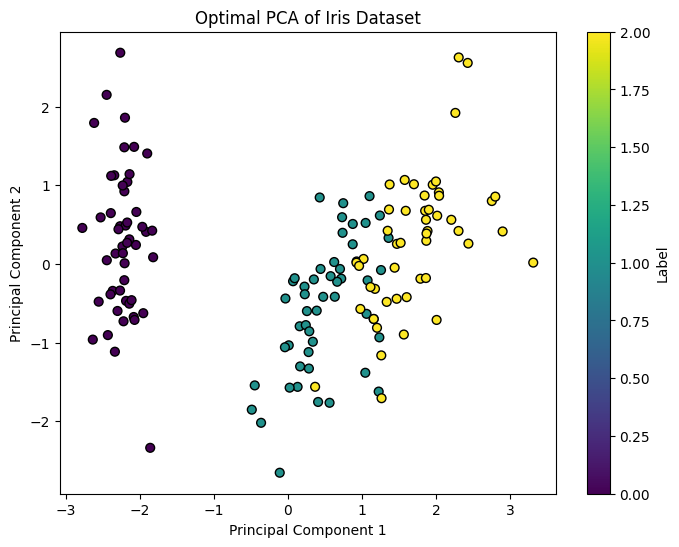

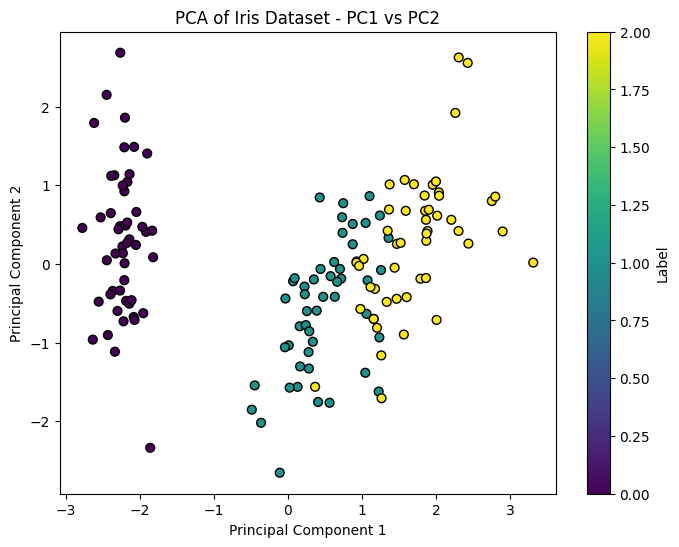

In [7]:
# Visualizations of the PCA-transformed data with different numbers of components

# Function to plot 2D PCA
def plot_2d_pca(X, y, title="2D PCA"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Label')
    plt.show()

# 2D PCA Visualization
plot_2d_pca(X_pca_opt, y, "Optimal PCA of Iris Dataset")

# Additional 3D PCA Visualization if more than two components are optimal
if n_components > 2:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_full[:, 0], X_pca_full[:, 1], X_pca_full[:, 2], c=y, cmap='viridis', edgecolor='k', s=40)
    ax.set_title("3D PCA of Iris Dataset")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    plt.show()

# Scatter plots for individual pairs of principal components
for i in range(n_components):
    for j in range(i+1, n_components):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca_full[:, i], X_pca_full[:, j], c=y, cmap='viridis', edgecolor='k', s=40)
        plt.title(f'PCA of Iris Dataset - PC{i+1} vs PC{j+1}')
        plt.xlabel(f'Principal Component {i+1}')
        plt.ylabel(f'Principal Component {j+1}')
        plt.colorbar(label='Label')
        plt.show()